In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import geopandas as gpd
import re
import os
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.dates import AutoDateFormatter, AutoDateLocator, ConciseDateConverter, ConciseDateFormatter

In [2]:
dir = 'N:/isipd/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/Tuk_met'

In [ ]:
station14 = pd.read_csv(dir + '/2203914.csv')
station14


,x,y,TOTAL_PRECIPITATION,LOCAL_DATE,PROVINCE_CODE,MAX_TEMPERATURE,MEAN_TEMPERATURE,MIN_REL_HUMIDITY,TOTAL_PRECIPITATION_FLAG,MAX_TEMPERATURE_FLAG,...,CLIMATE_IDENTIFIER,MAX_REL_HUMIDITY_FLAG,ID,DIRECTION_MAX_GUST_FLAG,TOTAL_RAIN,SPEED_MAX_GUST,MIN_REL_HUMIDITY_FLAG,SPEED_MAX_GUST_FLAG,LOCAL_YEAR,SNOW_ON_GROUND_FLAG
0,-133.016667,69.433333,NaN,1995-04-21 00:00:00,NT,-5.8,-7.5,NaN,M,NaN,...,2203914,NaN,2203914.1995.4.21,NaN,NaN,0.0,NaN,NaN,1995,NaN
1,-133.016667,69.433333,NaN,1995-04-22 00:00:00,NT,-0.6,-6.7,NaN,M,NaN,...,2203914,NaN,2203914.1995.4.22,M,NaN,41.0,NaN,NaN,1995,NaN
2,-133.016667,69.433333,NaN,1995-04-23 00:00:00,NT,2.6,-0.9,85.0,M,NaN,...,2203914,NaN,2203914.1995.4.23,M,NaN,39.0,NaN,NaN,1995,NaN
3,-133.016667,69.433333,NaN,1995-04-24 00:00:00,NT,0.7,-3.8,NaN,M,NaN,...,2203914,NaN,2203914.1995.4.24,NaN,NaN,0.0,NaN,NaN,1995,NaN
4,-133.016667,69.433333,NaN,1995-04-25 00:00:00,NT,3.8,-1.5,NaN,M,NaN,...,2203914,NaN,2203914.1995.4.25,NaN,NaN,0.0,NaN,NaN,1995,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10602,-133.016667,69.433333,0.0,2024-11-21 00:00:00,NT,-6.5,-9.4,77.0,NaN,NaN,...,2203914,NaN,2203914.2024.11.21,NaN,NaN,60.0,NaN,NaN,2024,NaN
10603,-133.016667,69.433333,0.0,2024-11-22 00:00:00,NT,-9.4,-10.9,73.0,NaN,NaN,...,2203914,NaN,2203914.2024.11.22,NaN,NaN,51.0,NaN,NaN,2024,NaN
10604,-133.016667,69.433333,0.0,2024-11-23 00:00:00,NT,-11.5,-15.7,79.0,NaN,NaN,...,2203914,NaN,2203914.2024.11.23,NaN,NaN,NaN,NaN,NaN,2024,NaN
10605,-133.016667,69.433333,0.1,2024-11-24 00:00:00,NT,-14.9,-19.0,81.0,NaN,NaN,...,2203914,NaN,2203914.2024.11.24,NaN,NaN,NaN,NaN,NaN,2024,NaN


In [4]:
station14_mean = station14["MEAN_TEMPERATURE"].mean()
print('mean', station14_mean)
station14_min = station14["MIN_TEMPERATURE"].min()
print('min', station14_min)
station14_max = station14["MAX_TEMPERATURE"].max()
print('max', station14_max)

mean -8.447420244190626
min -43.2
max 30.4


In [24]:
station14['datetime'] = pd.to_datetime(station14['LOCAL_DATE'])
start_date = '1995-11-24 00:00:00'
end_date = '2024-11-24 00:00:00'
station14.set_index(station14['datetime'], inplace=True)
 # Slice the DataFrame to the desired date range
station14 = station14.loc[start_date:end_date]

station14['FDD'] = (station14["MEAN_TEMPERATURE"] < 0) * (-station14["MEAN_TEMPERATURE"])  # Change to iloc[:, 1]
total_fdd = station14['FDD'].sum()
fdd = station14.groupby(station14['LOCAL_YEAR'])['FDD'].sum()
station14['TDD'] = (station14["MEAN_TEMPERATURE"] > 0) * station14["MEAN_TEMPERATURE"]  # Change to iloc[:, 1]
total_tdd = station14['TDD'].sum()
tdd = station14.groupby(station14['LOCAL_YEAR'])['TDD'].sum()
        

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_33152\1249448179.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station14['FDD'] = (station14["MEAN_TEMPERATURE"] < 0) * (-station14["MEAN_TEMPERATURE"])  # Change to iloc[:, 1]
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_33152\1249448179.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station14['TDD'] = (station14["MEAN_TEMPERATURE"] > 0) * station14["MEAN_TEMPERATURE"]  # Change to iloc[:, 1]


In [25]:
fdd.mean()

3828.18

In [26]:
tdd.mean()

954.9033333333334

In [ ]:

        df.set_index(df.iloc[:, 0], inplace=True)
        
        # Slice the DataFrame to the desired date range
        df = df.loc[start_date:end_date]
        
        # Resample the temperature column (assuming it's the 3rd column) to daily mean
        daily_mean = df.iloc[:, 2].resample('D').mean().reset_index()

        daily_mean['FDD'] = (daily_mean.iloc[:, 1] < 0) * (-daily_mean.iloc[:, 1])  # Change to iloc[:, 1]
        total_fdd = daily_mean['FDD'].sum()

    # Calculate Thawing Degree Days (TDD)
        daily_mean['TDD'] = (daily_mean.iloc[:, 1] > 0) * daily_mean.iloc[:, 1]  # Change to iloc[:, 1]
        total_tdd = daily_mean['TDD'].sum()

        # Store results
        results[file_id] = {'Total FDD Days': total_fdd, 'Total TDD Days': total_tdd}

# Print results for all files
for file_id, result in results.items():
    print(f"File {file_id}: Freezing Degree Days = {result['Total FDD Days']}, Thawing Degree Days = {result['Total TDD Days']}")

results  
        

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_29032\3402033320.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


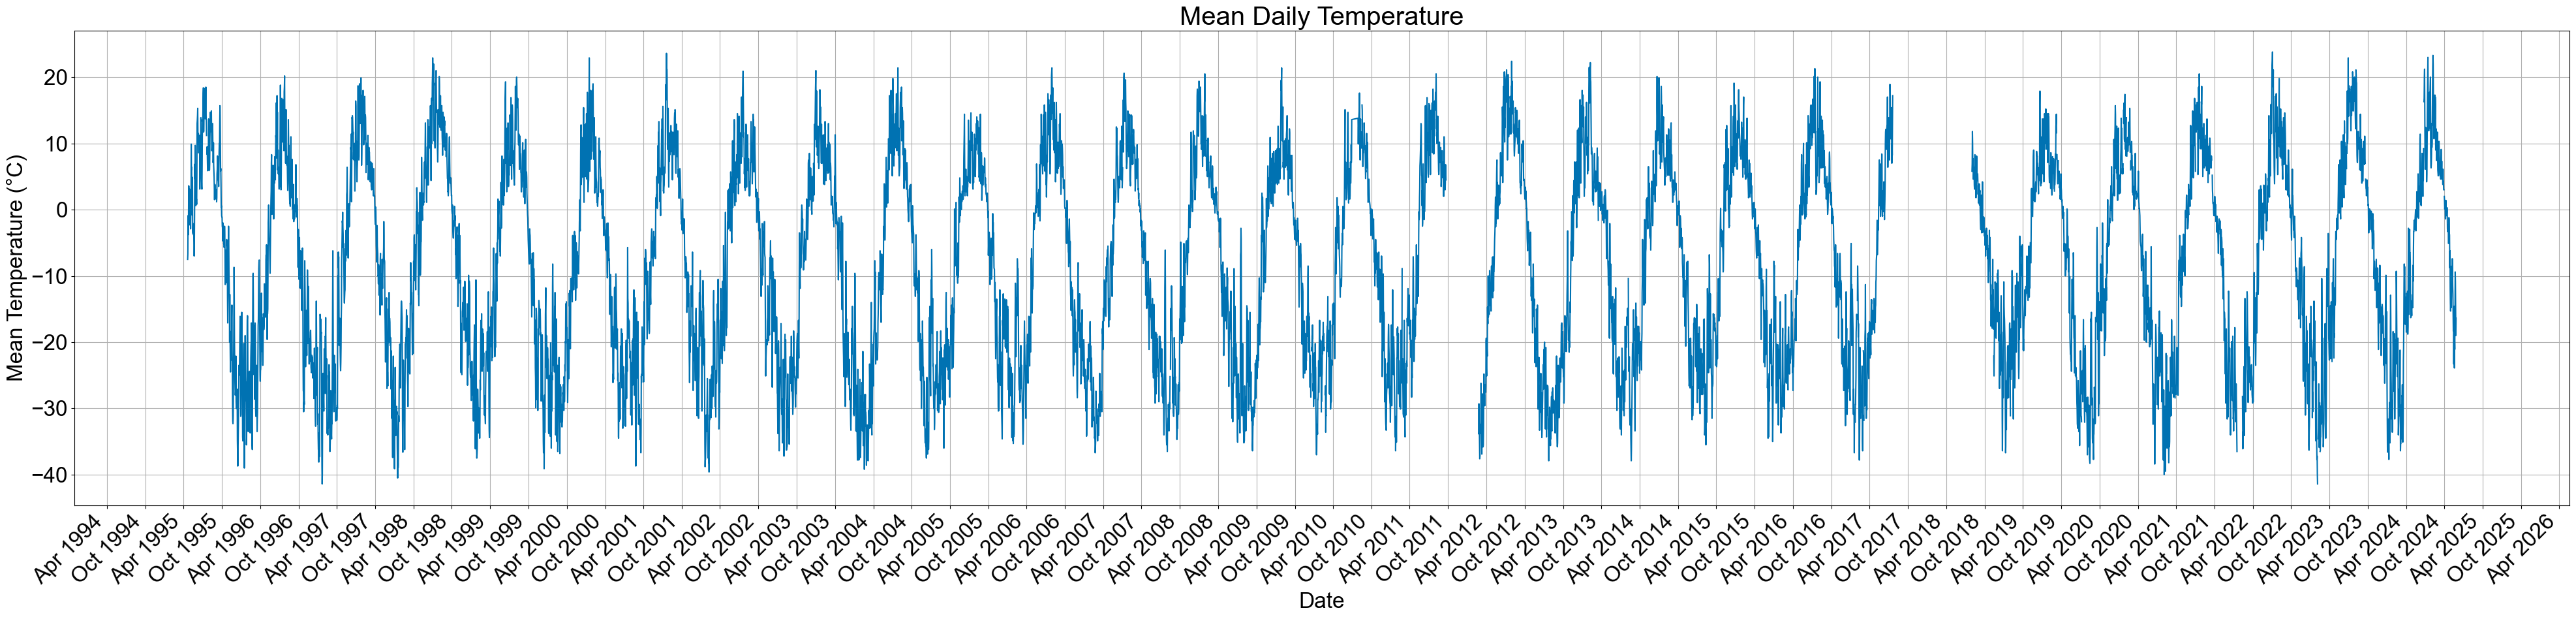

In [24]:
from matplotlib.dates import AutoDateFormatter, AutoDateLocator, ConciseDateConverter, ConciseDateFormatter


plt.figure(figsize=(40, 10))
plt.rcParams['font.size'] = 24
plt.rcParams['font.family'] = 'Arial'
plt.style.use('seaborn-v0_8-colorblind')


plt.plot(station14['datetime'], station14['MEAN_TEMPERATURE'], linestyle='-')

# Get the current axes and set locators and formatters
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=6))
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Customize the plot
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Daily Temperature')
plt.grid(True)


plt.tight_layout()
plt.show()

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_29032\2230110532.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


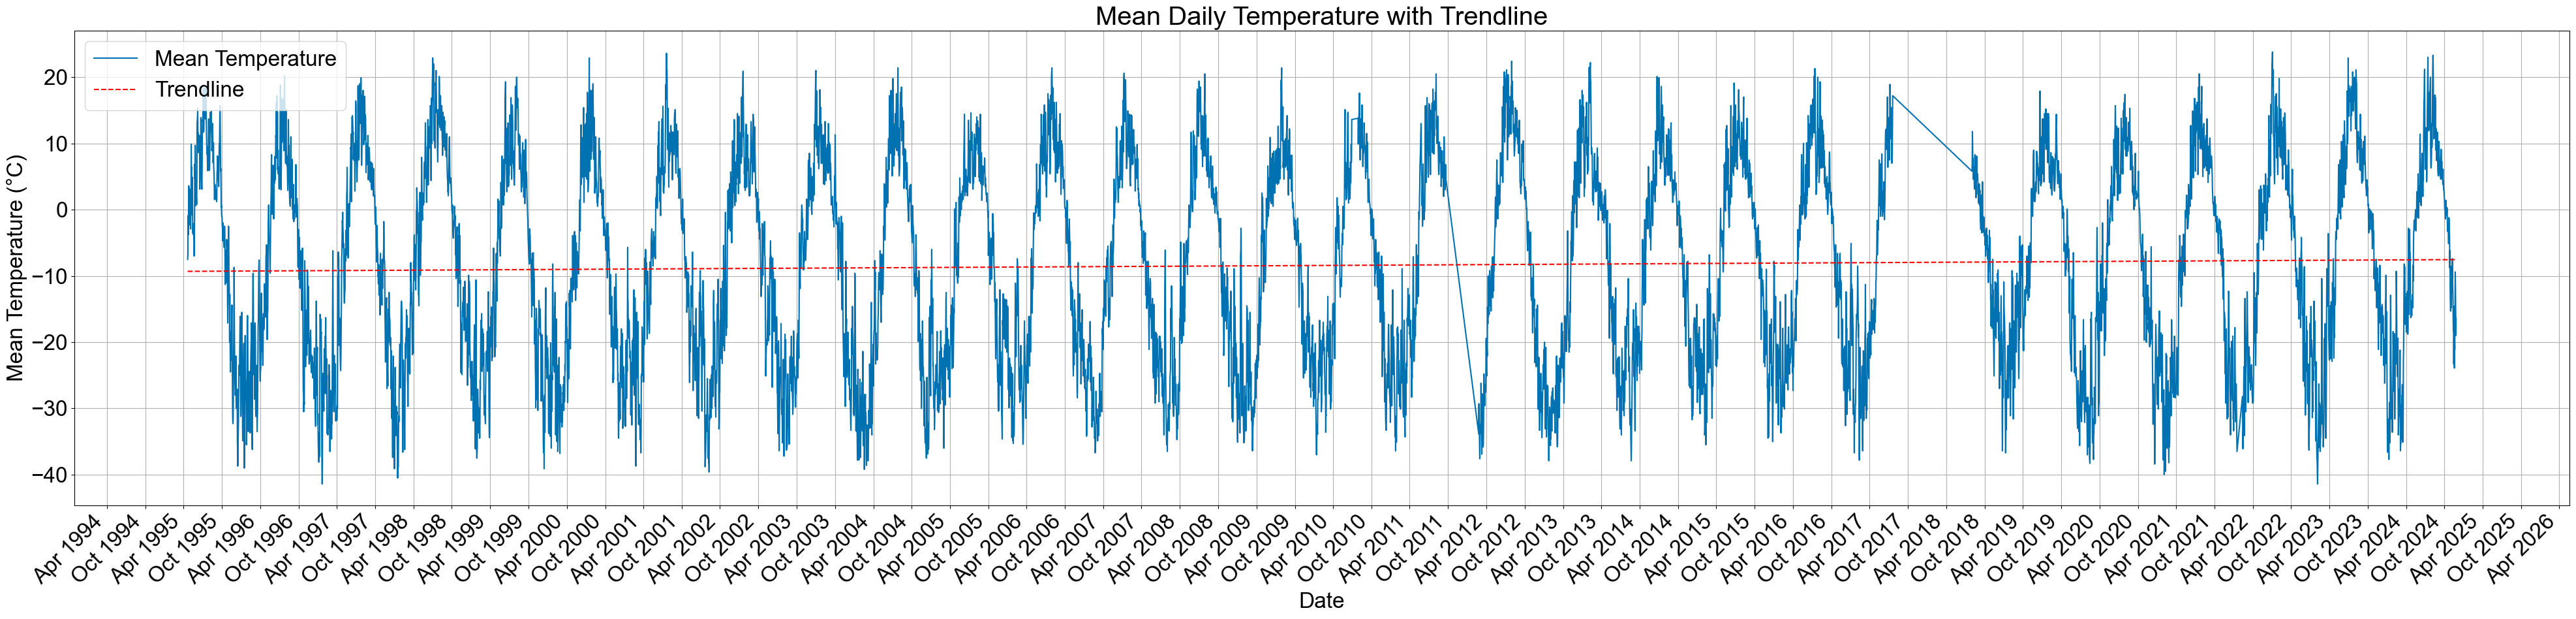

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

# Handle missing values
station14 = station14.dropna(subset=['MEAN_TEMPERATURE'])  # Remove NaNs
# Alternatively, interpolate: station14['MEAN_TEMPERATURE'] = station14['MEAN_TEMPERATURE'].interpolate(method='linear')

# Convert datetime to numeric format for regression
station14['numeric_date'] = station14['datetime'].map(lambda x: x.toordinal())

# Fit a linear regression model
X = station14['numeric_date'].values.reshape(-1, 1)  # Predictor (numeric date)
y = station14['MEAN_TEMPERATURE'].values  # Response (temperature)
model = LinearRegression()
model.fit(X, y)

# Predict temperature values using the model
trendline = model.predict(X)

# Plot the data
plt.figure(figsize=(40, 10))
plt.rcParams['font.size'] = 24
plt.rcParams['font.family'] = 'Arial'
plt.style.use('seaborn-v0_8-colorblind')

plt.plot(station14['datetime'], station14['MEAN_TEMPERATURE'], linestyle='-', label='Mean Temperature')
plt.plot(station14['datetime'], trendline, color='red', linestyle='--', label='Trendline')  # Trendline

# Get the current axes and set locators and formatters
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=6))
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Daily Temperature with Trendline')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



In [29]:
slope = model.coef_[0]  # The rate of change in temperature per day
slope_per_year = slope * 365  # Approximate annual change
slope_per_year

0.05988476225755402

In [30]:
# Add a 'year' column for grouping
station14['year'] = station14['datetime'].dt.year

# Calculate total yearly precipitation
total_yearly_precipitation = station14.groupby('year')['TOTAL_PRECIPITATION'].sum()

# Calculate mean daily precipitation
mean_daily_precipitation = station14['TOTAL_PRECIPITATION'].mean()

# Print results
print("Total Yearly Precipitation (mm):")
print(total_yearly_precipitation)

print(f"\nMean Daily Precipitation (mm/day): {mean_daily_precipitation:.2f}")

Total Yearly Precipitation (mm):
year
1995      0.0
1996      0.0
1997      0.0
1998      0.0
1999     18.6
2000      0.0
2001      0.0
2002      0.0
2003      0.0
2004      0.0
2005      0.0
2006      0.0
2007      0.0
2008      0.0
2009      0.0
2010      0.0
2011      0.0
2012      0.0
2013      0.0
2014      0.0
2015      0.0
2016      0.0
2017      0.0
2018      0.0
2019      0.0
2020      0.0
2021     55.8
2022    145.1
2023    123.8
2024    186.3
Name: TOTAL_PRECIPITATION, dtype: float64

Mean Daily Precipitation (mm/day): 0.59
